# Kwantylowa adaptacja parametru $\sigma$

In [80]:
library(tidyverse)
library(magrittr)
library(furrr)
library(tictoc)
source("../src/cma-es-no-cma.R")
source("../src/cma-es-new-sigma-down.R")
source("../src/cma-es-no-sigma.R")
source("../src/cma-es-onefifth-sigma.R")
source("../src/eval-funcs.R")
source("../src/exp-utils.R")
source("../src/data-utils.R")
source("../src/plot-funcs.R")
source("../src/quantile-utils.R")
options(repr.plot.width=10, repr.plot.height=10)

## Eksperyment

* `no_cma_es_no_sigma()`: CMA-ES ze stałą $\sigma$ i macierzą kowariancji $I_N$
* `no_cma_es()`: CMA-ES z adaptacją $\sigma$ wg CSA i macierzą kowariancji $I_N$
* `no_cma_es_no_sigma_down()`: CMA-ES z "kwantylową" adaptacją $\sigma$ i macierzą kowariancji $I_N$


1. $\lambda$ =  $4N$
2. maxit = 1000
3. $x \in [-1000, 1000]^{10}$



In [103]:
gutter_eval = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_down),
                gutter_func,
                5,
                1000,
                lower = -1000,
                upper = 1000)

In [99]:
sphere_eval = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_down),
                sphere_func,
                10,
                1000,
                lower = -1000,
                upper = 1000)

In [97]:
linear_eval = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_down),
                linear_func,
                100,
                1000,  
                lower = -1000,
                upper = 1000)

In [76]:
linear_eval %>% str

List of 8
 $ par              : NULL
 $ value            : num Inf
 $ counts           : Named int [1:2] 200000 NA
  ..- attr(*, "names")= chr [1:2] "function" "gradient"
 $ convergence      : int 1
 $ message          : NULL
 $ label            : chr "no-cma-es-sigma-csa"
 $ constr.violations: int 200000
 $ diagnostic       :List of 4
  ..$ value: num [1:1000, 1:100] 5203 6138 10228 12192 11416 ...
  ..$ sigma: num [1:1000] 0.5 0.54 0.623 0.75 0.925 ...
  ..$ eigen: num [1:1000, 1:50] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ pop  : num [1:50, 1:200, 1:1000] 1000 999 1000 1000 1000 ...
 - attr(*, "class")= chr "cma_es.result"


## Krzywe zbieżności

### Funkcja gutter $q(x) = x_1 + \sum^{\lambda}_{i = 2}x^{2}_{i}$

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message:
“Removed 1654 rows containing missing values (geom_point).”
Warning message:
“Removed 1652 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1654 rows containing missing values (geom_point).”
Warning message:
“Removed 1653 row(s) containing missing values (geom_path).”


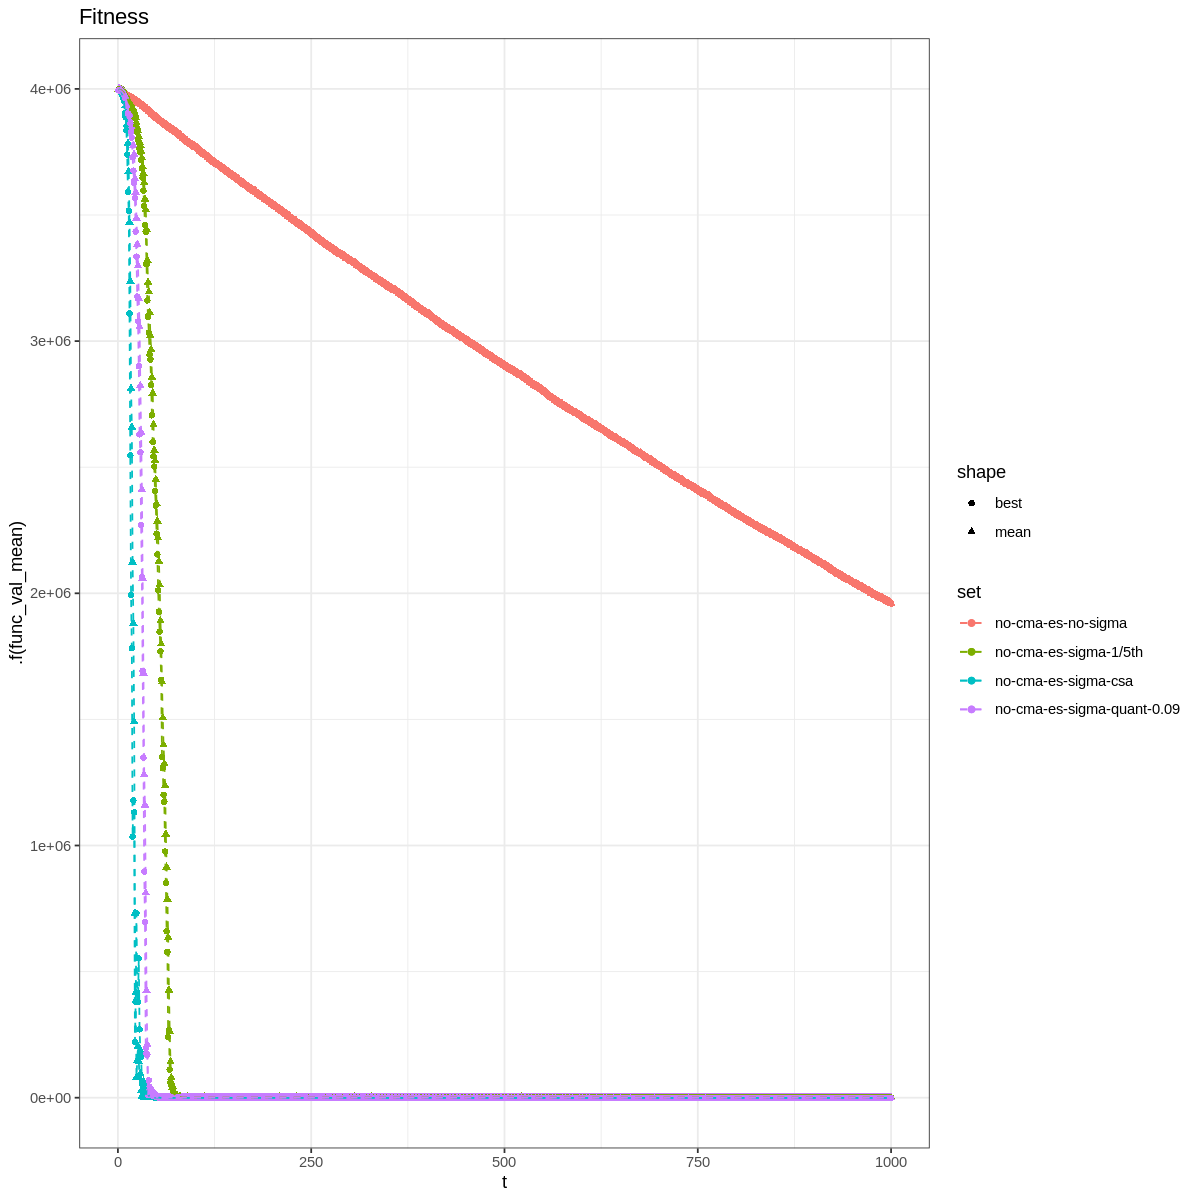

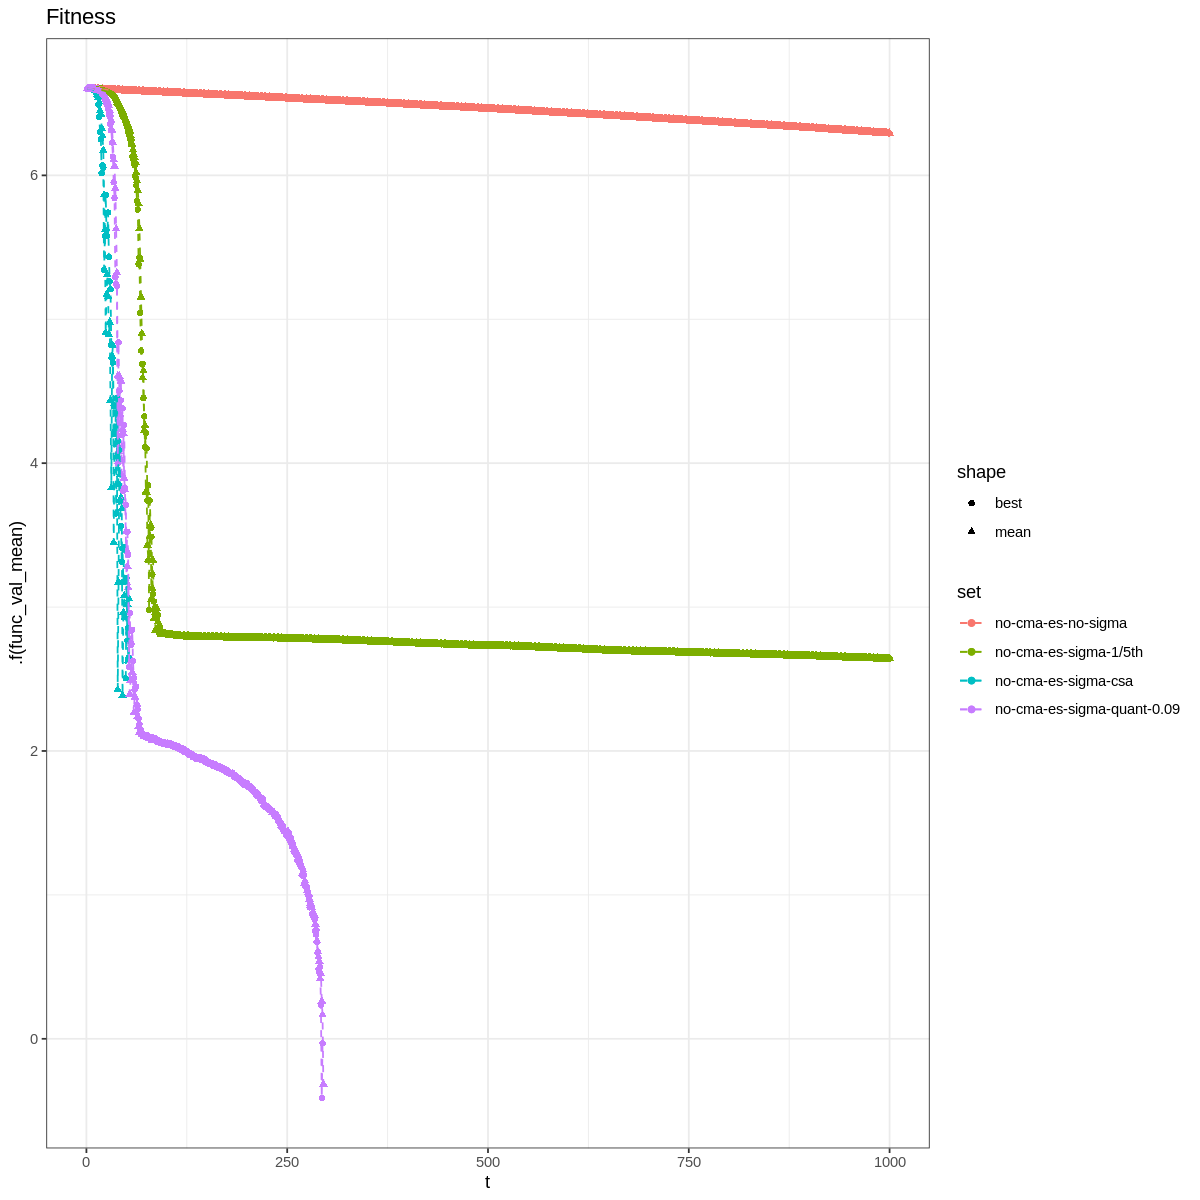

In [104]:
gutter_eval %>% value_plot()
gutter_eval %>% value_plot(.f=log10)

### Funkcja sferyczna $q(x) = x^{T}x$

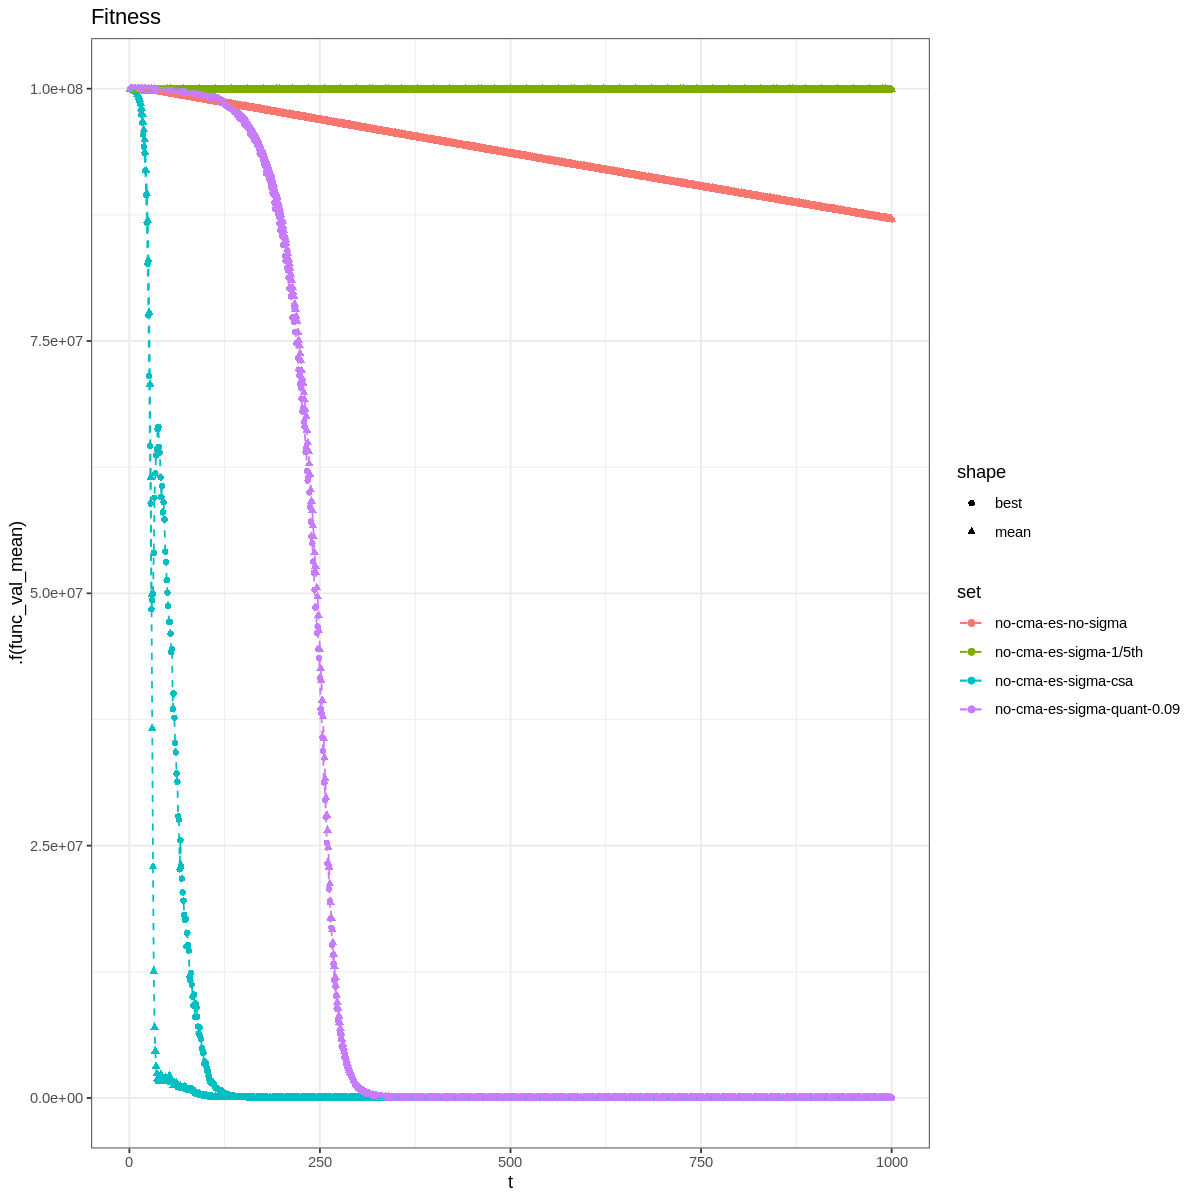

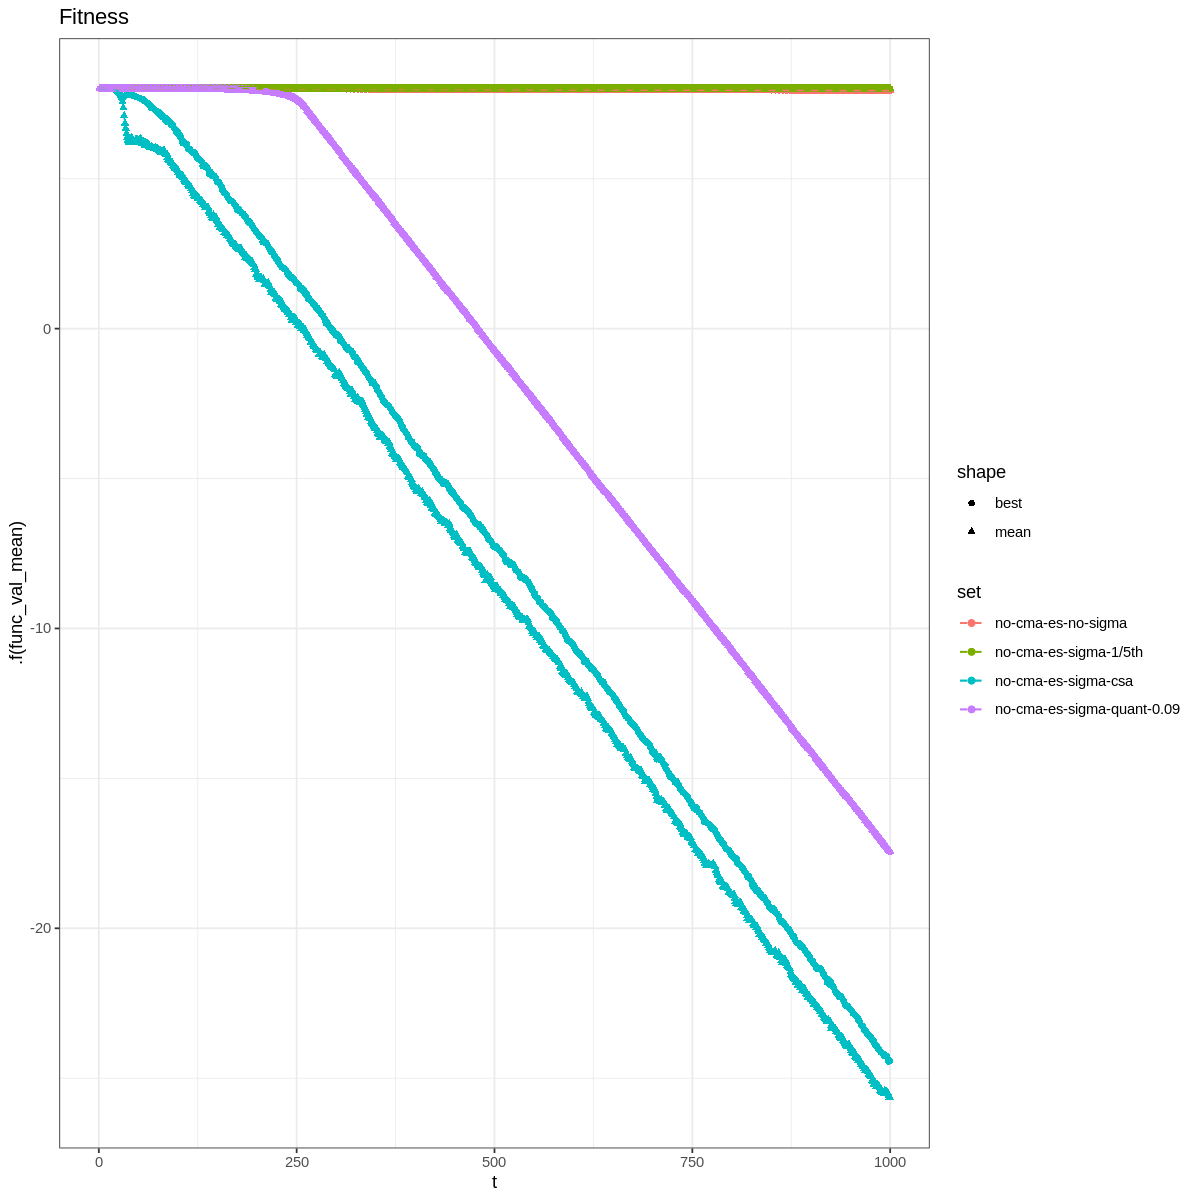

In [33]:
sphere_eval %>% value_plot()
sphere_eval %>% value_plot(.f=log10)

### Funkcja liniowa $q(x) = x_1$

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message:
“Removed 1547 rows containing missing values (geom_point).”
Warning message:
“Removed 1547 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1551 rows containing missing values (geom_point).”
Warning message:
“Removed 1550 row(s) containing missing values (geom_path).”


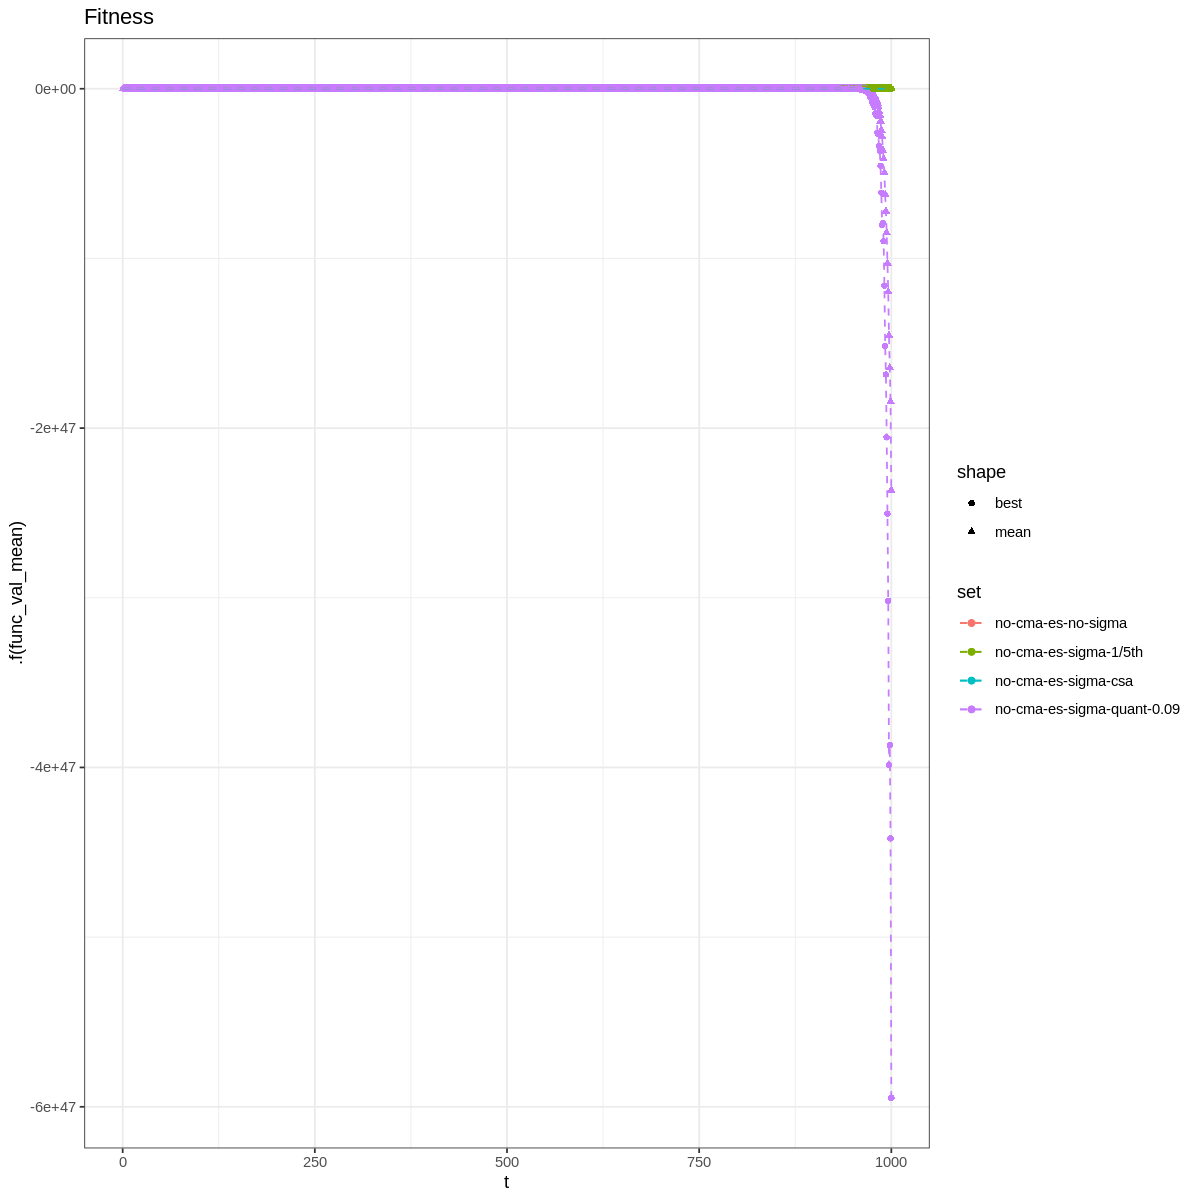

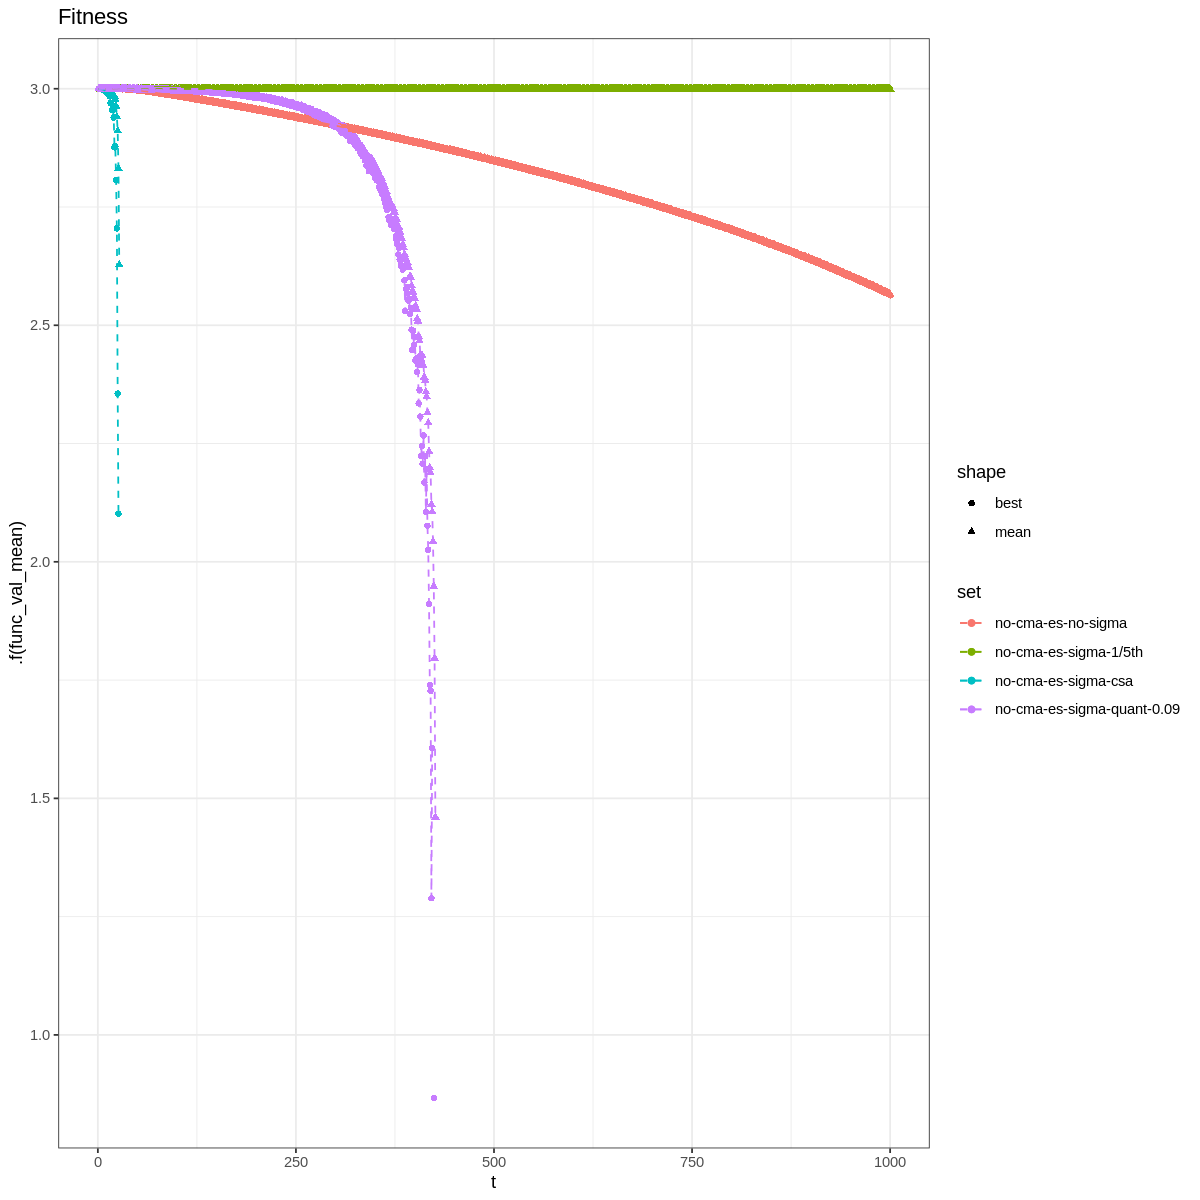

In [98]:
linear_eval %>% value_plot() 
linear_eval %>% value_plot(.f=log10) 

## Strojenie reguły kwantylowej (f-cja sferyczna)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 5400 rows containing missing values (geom_point).”
Warning message:
“Removed 5400 row(s) containing missing values (geom_path).”
Warning message:
“Removed 5400 rows containing missing values (geom_point).”
Warning message:
“Removed 5400 row(s) containing missing values (geom_path).”


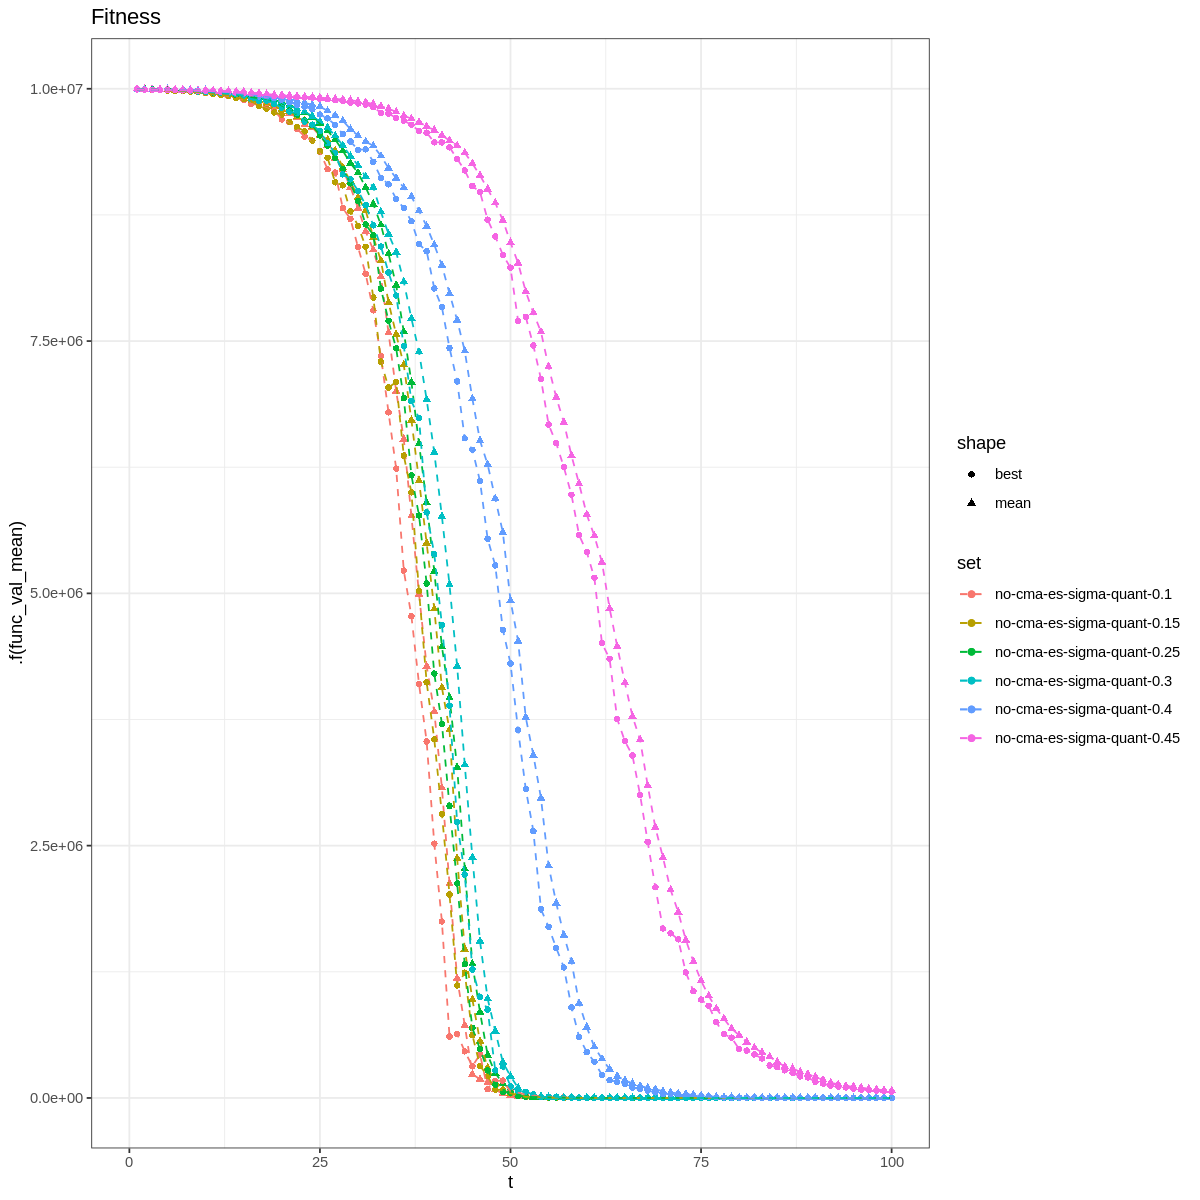

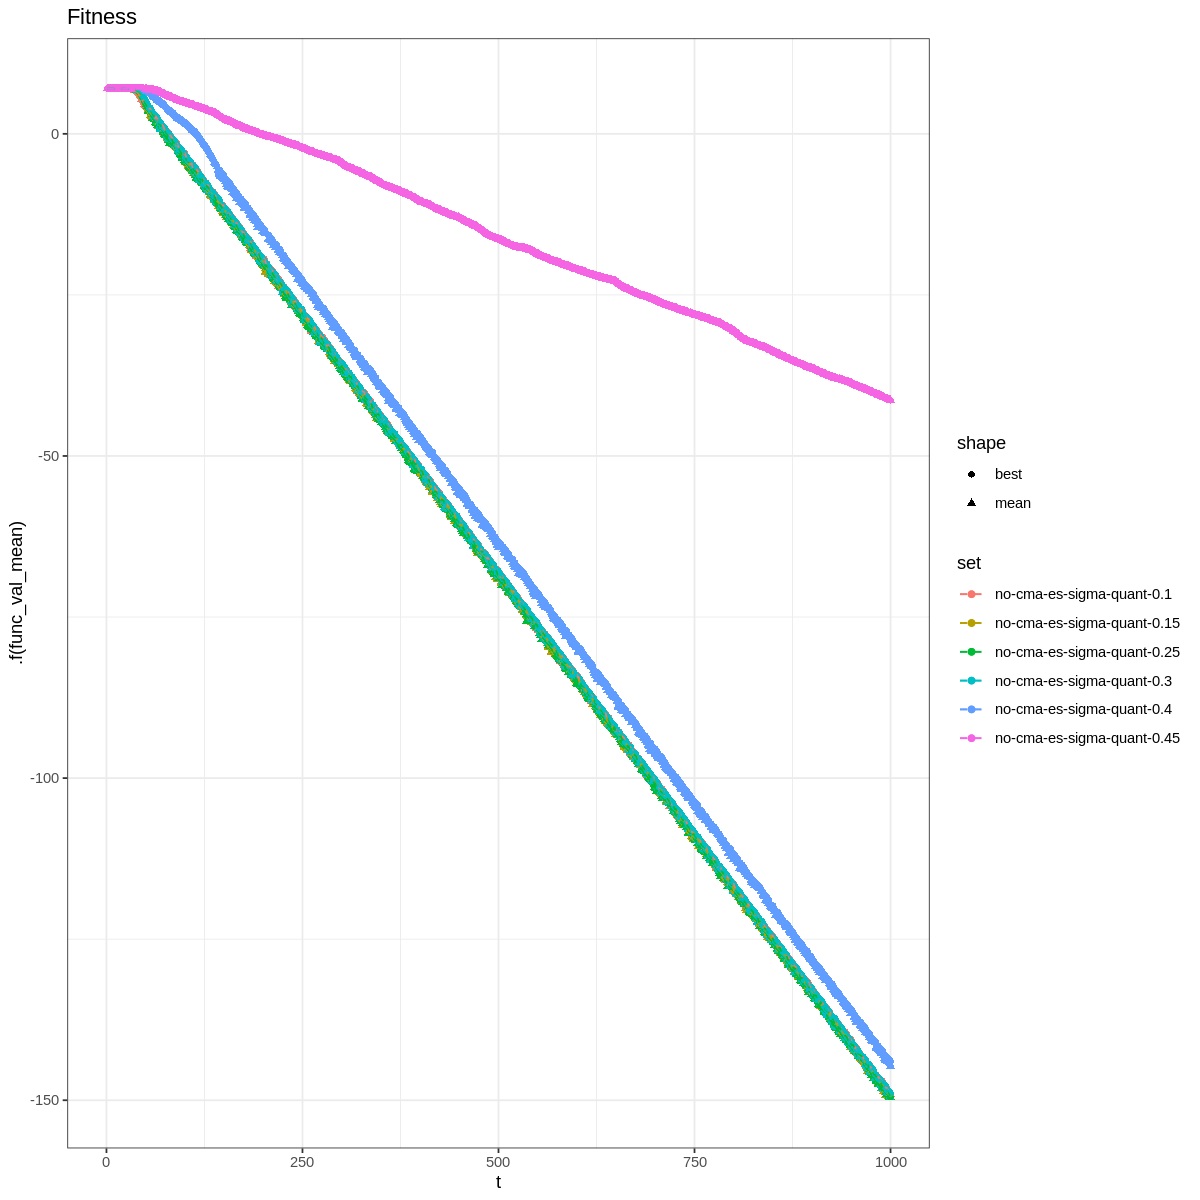

In [45]:
sphere_q %>%  value_plot() + xlim(0, 100)
sphere_q %>%  value_plot(.f=log10)

## Ratio best vs mean (czerwona linia pozioma: mediana, niebieska linia pozioma: $y = 1$)

### Funkcja gutter

Warning message:
“Removed 6 rows containing missing values (geom_point).”


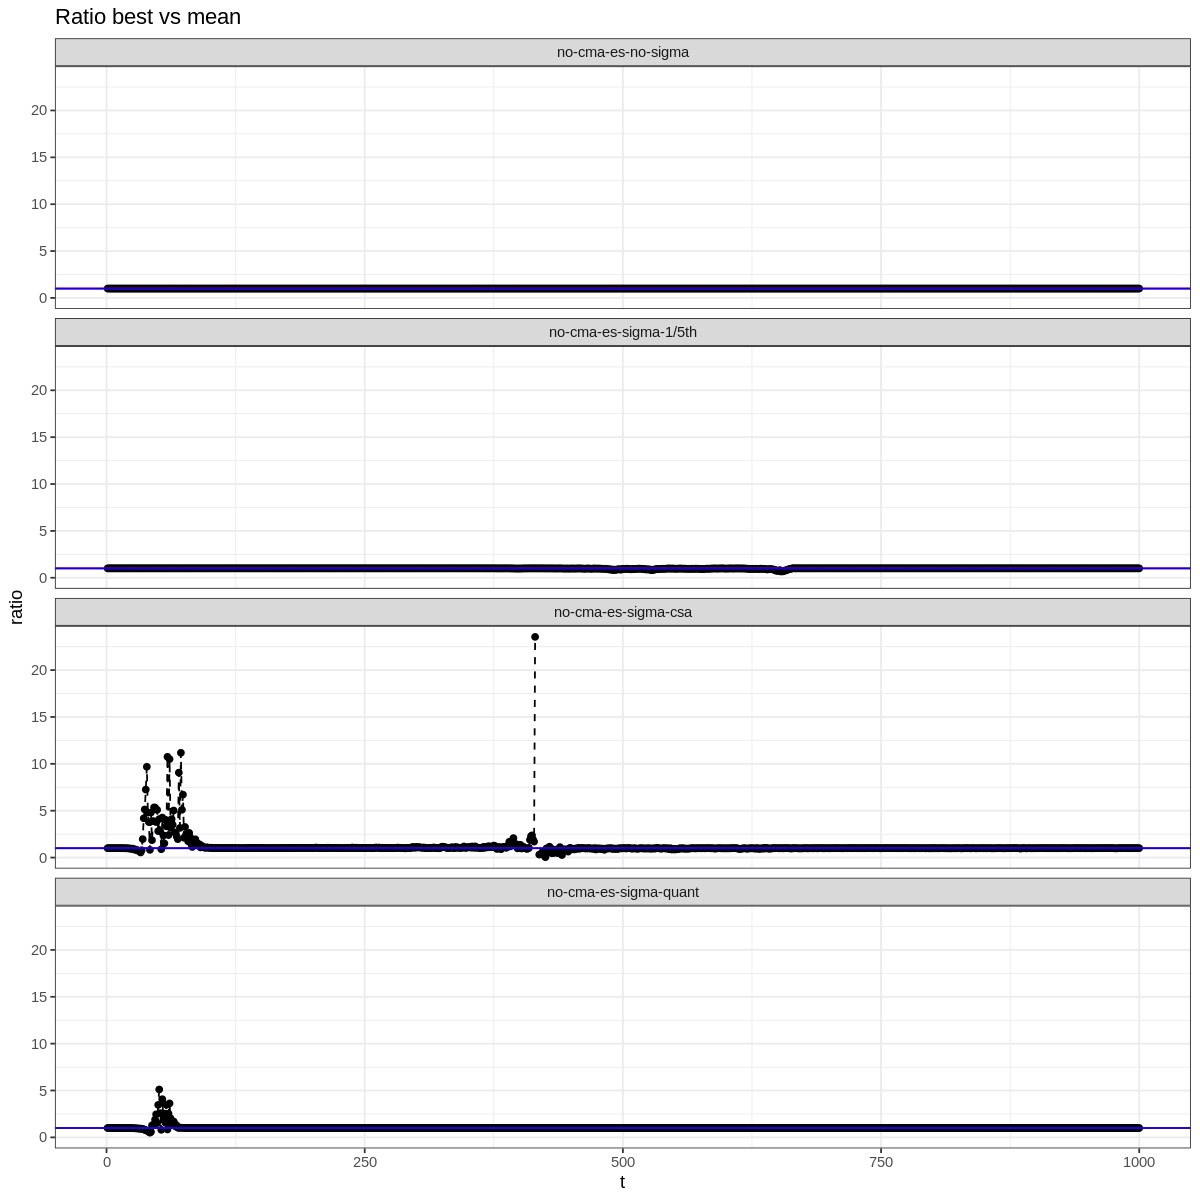

In [29]:
gutter_eval %>% ratio_plot()

### Funkcja sferyczna

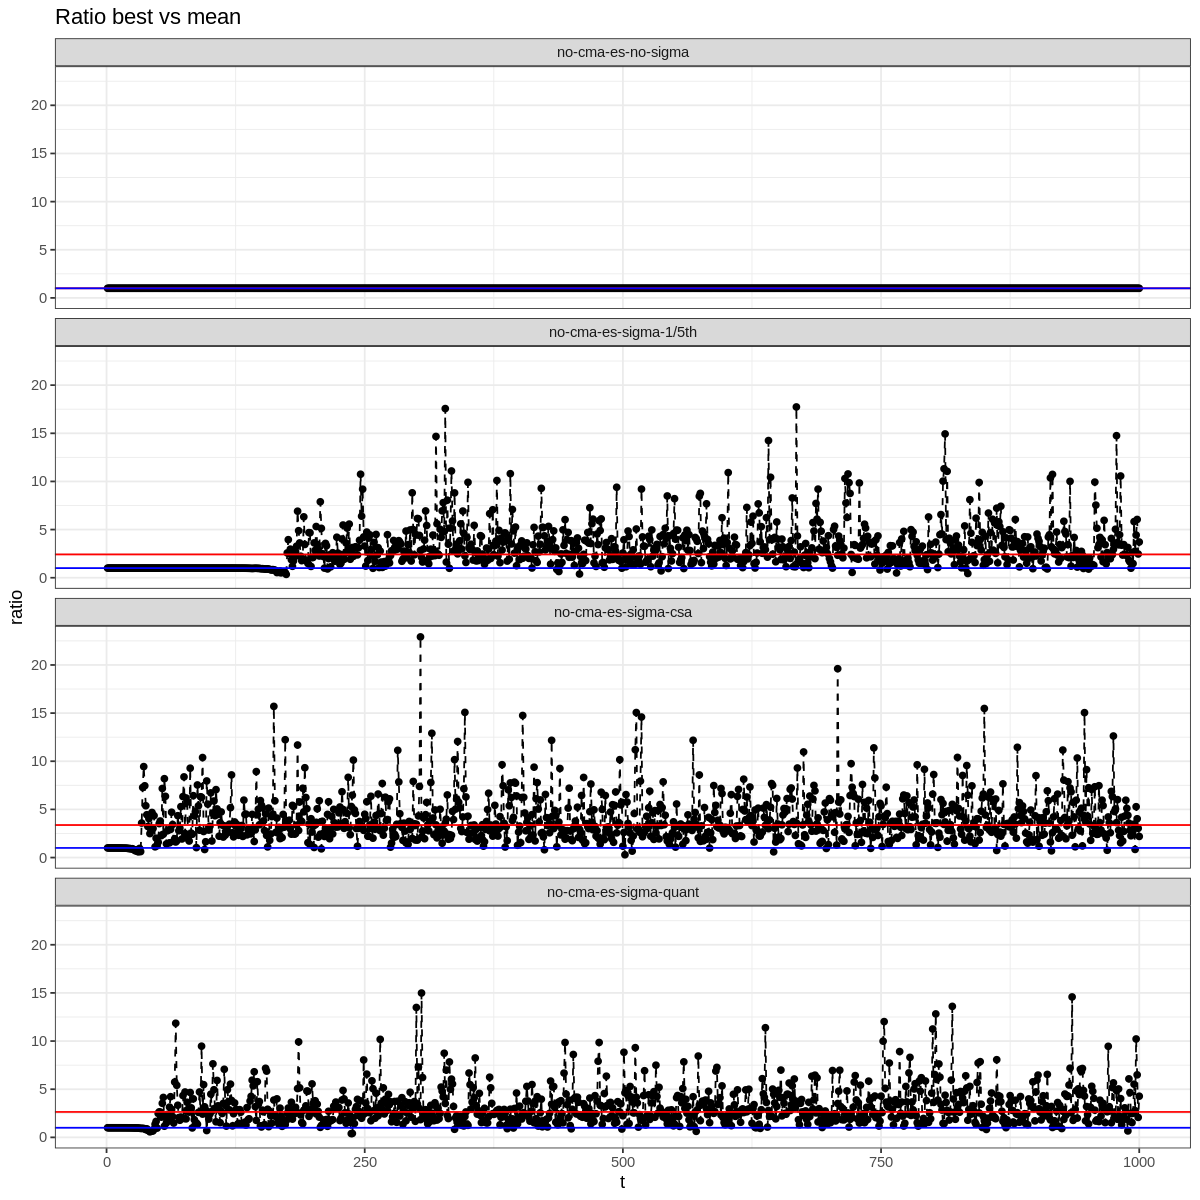

In [30]:
sphere_eval %>% ratio_plot()

### Funkcja liniowa

Warning message:
“Removed 4 rows containing missing values (geom_point).”


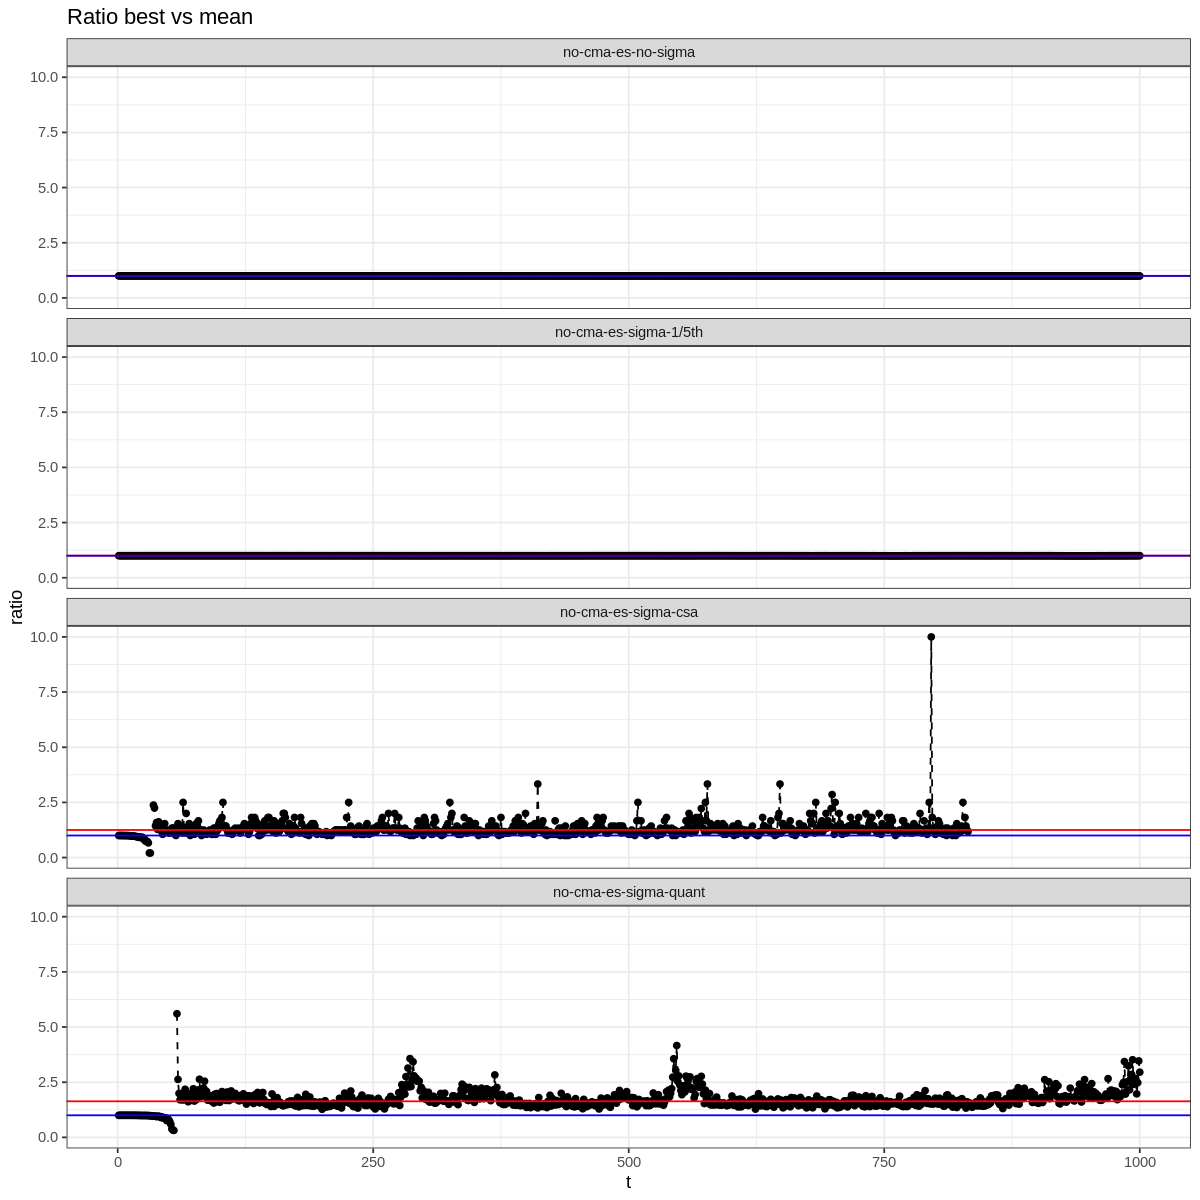

In [31]:
linear_eval %>% ratio_plot()

## Kwantyl przystosowania punktu środkowego w populacji CMA-ES-SIGMA-QUANT

In [197]:
repetitions = 10

### Funkcja gutter

In [198]:
results = 
  main(10, gutter_func, no_cma_es_sigma_down, -1, 1000, repetitions)

In [199]:
summary_result = 
  1:repetitions %>%
  purrr::map(function(iter) {
    results[[iter]]$df %>% 
      dplyr::summarize(mean_ave = mean(mean_q),
                       mean_min = min(mean_q),
                       mean_max = max(mean_q))
    }) %>%
  purrr::reduce(dplyr::bind_rows) %>%
  dplyr::mutate(t = 1:dplyr::n())

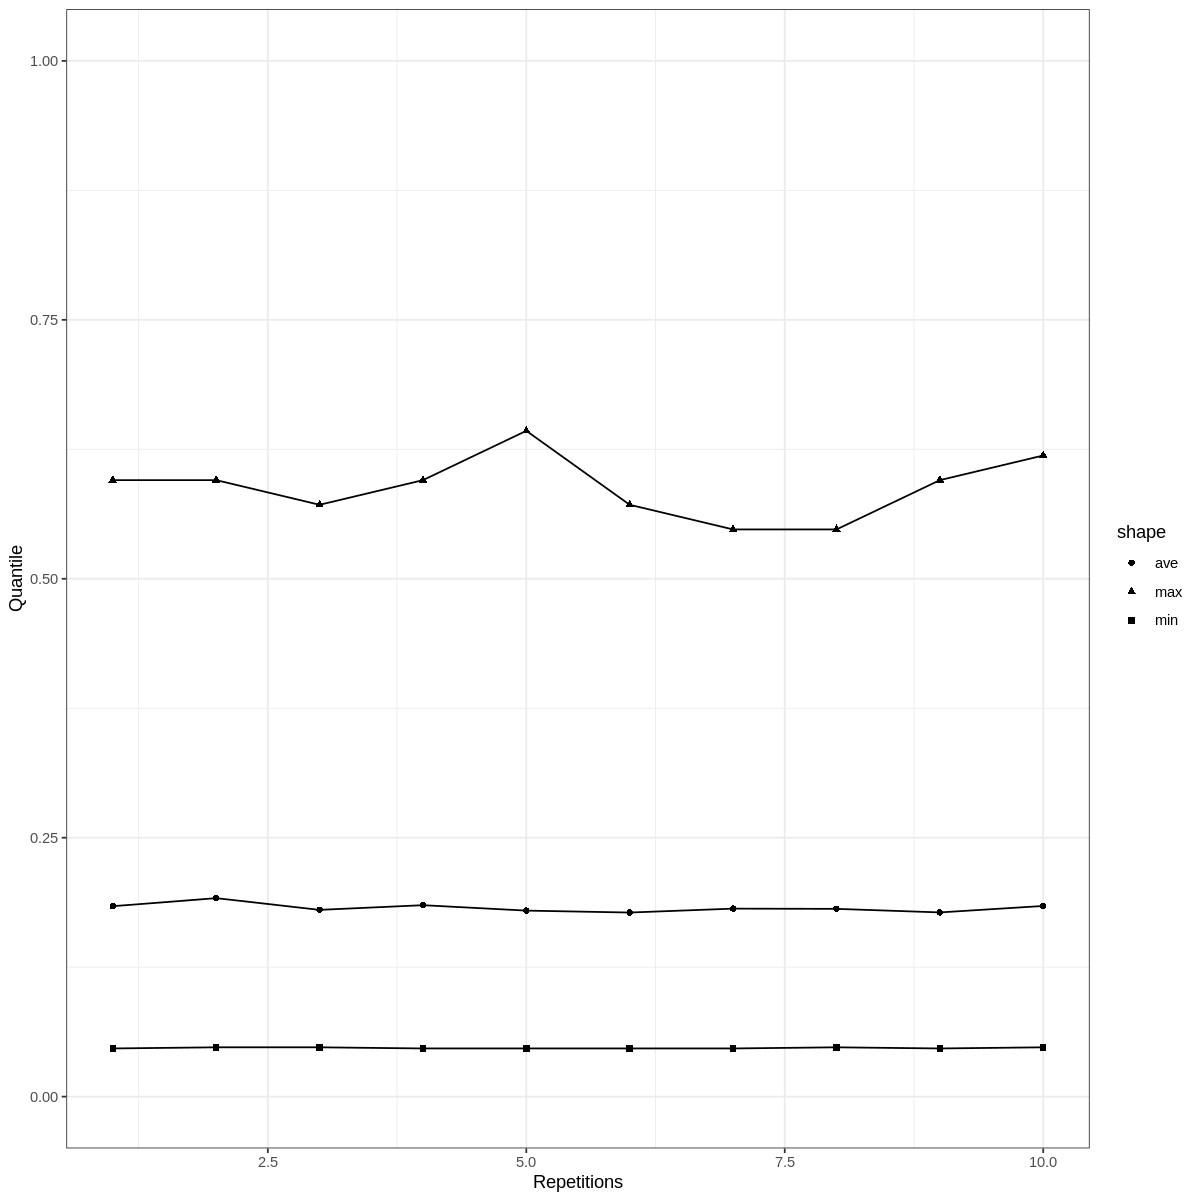

In [200]:
summary_result %>% 
    quantile_plot("mean") + ylim(0, 1)

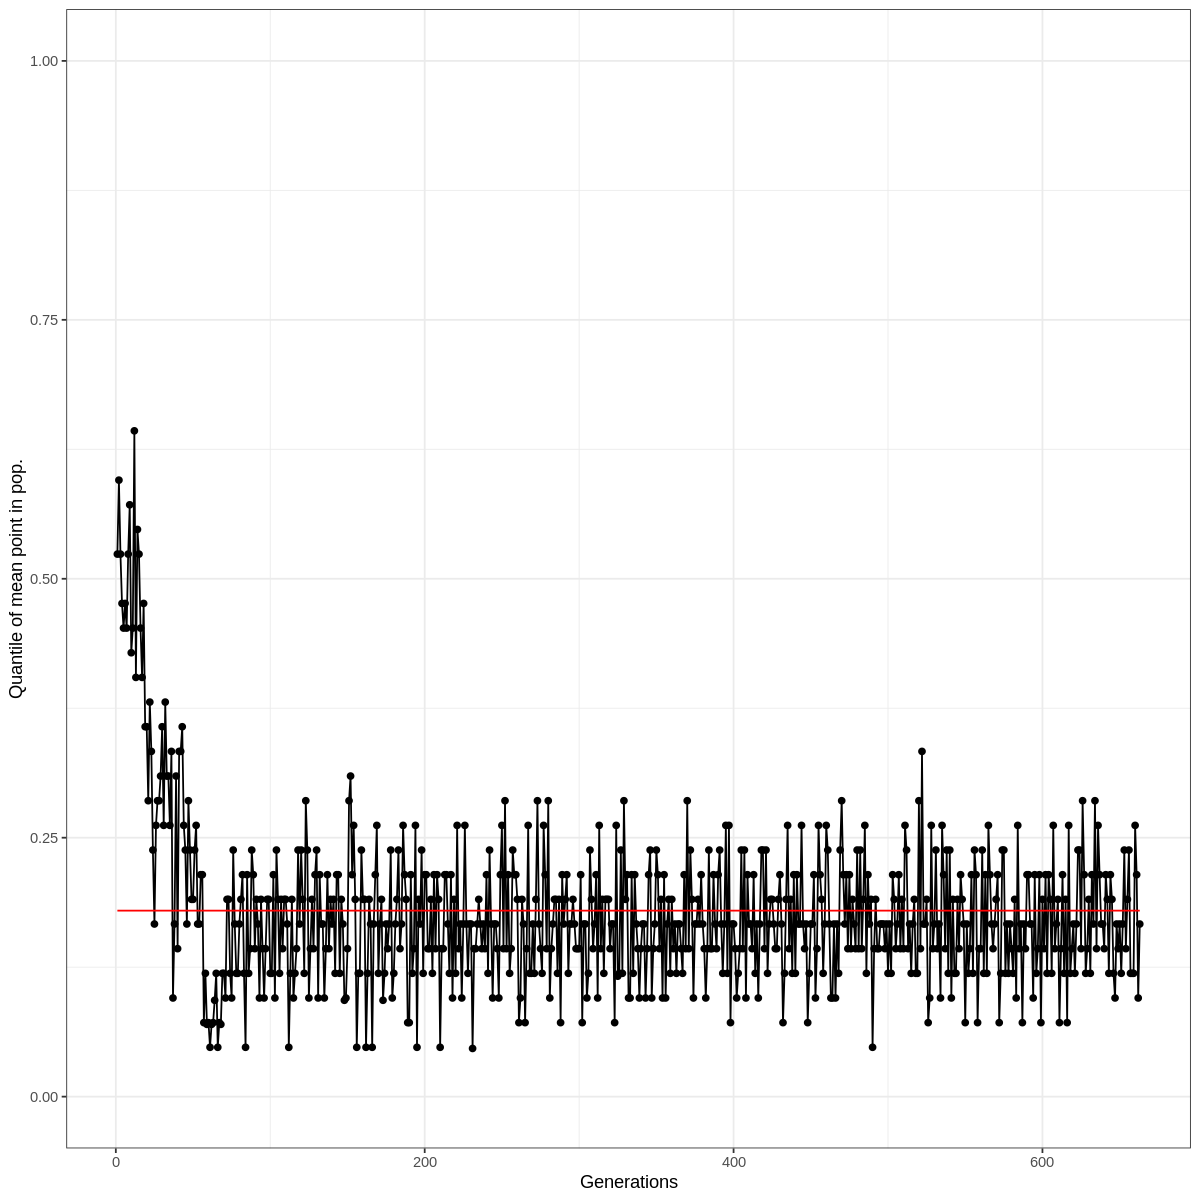

In [204]:
results[[5]] %>% quantileGens_plot()

### Funkcja sferyczna

In [207]:
results = 
  main(10, sphere_func, no_cma_es_sigma_down, -1, 1000, repetitions)

In [208]:
summary_result = 
  1:repetitions %>%
  purrr::map(function(iter) {
    results[[iter]]$df %>% 
      dplyr::summarize(mean_ave = mean(mean_q),
                       mean_min = min(mean_q),
                       mean_max = max(mean_q))
    }) %>%
  purrr::reduce(dplyr::bind_rows) %>%
  dplyr::mutate(t = 1:dplyr::n())

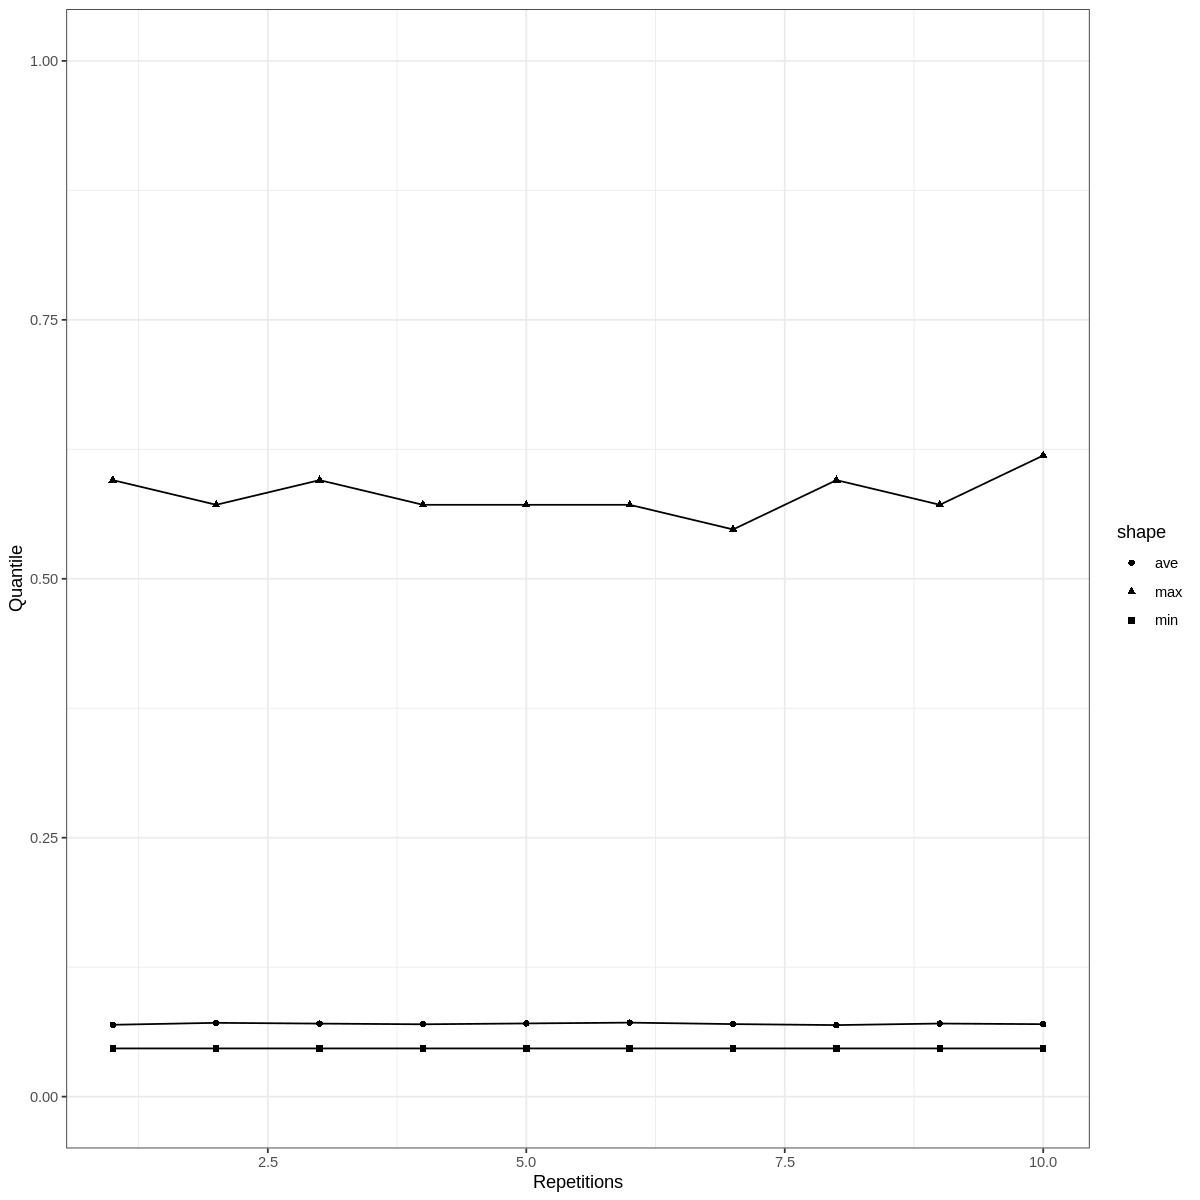

In [209]:
summary_result %>% 
    quantile_plot("mean") + ylim(0, 1)

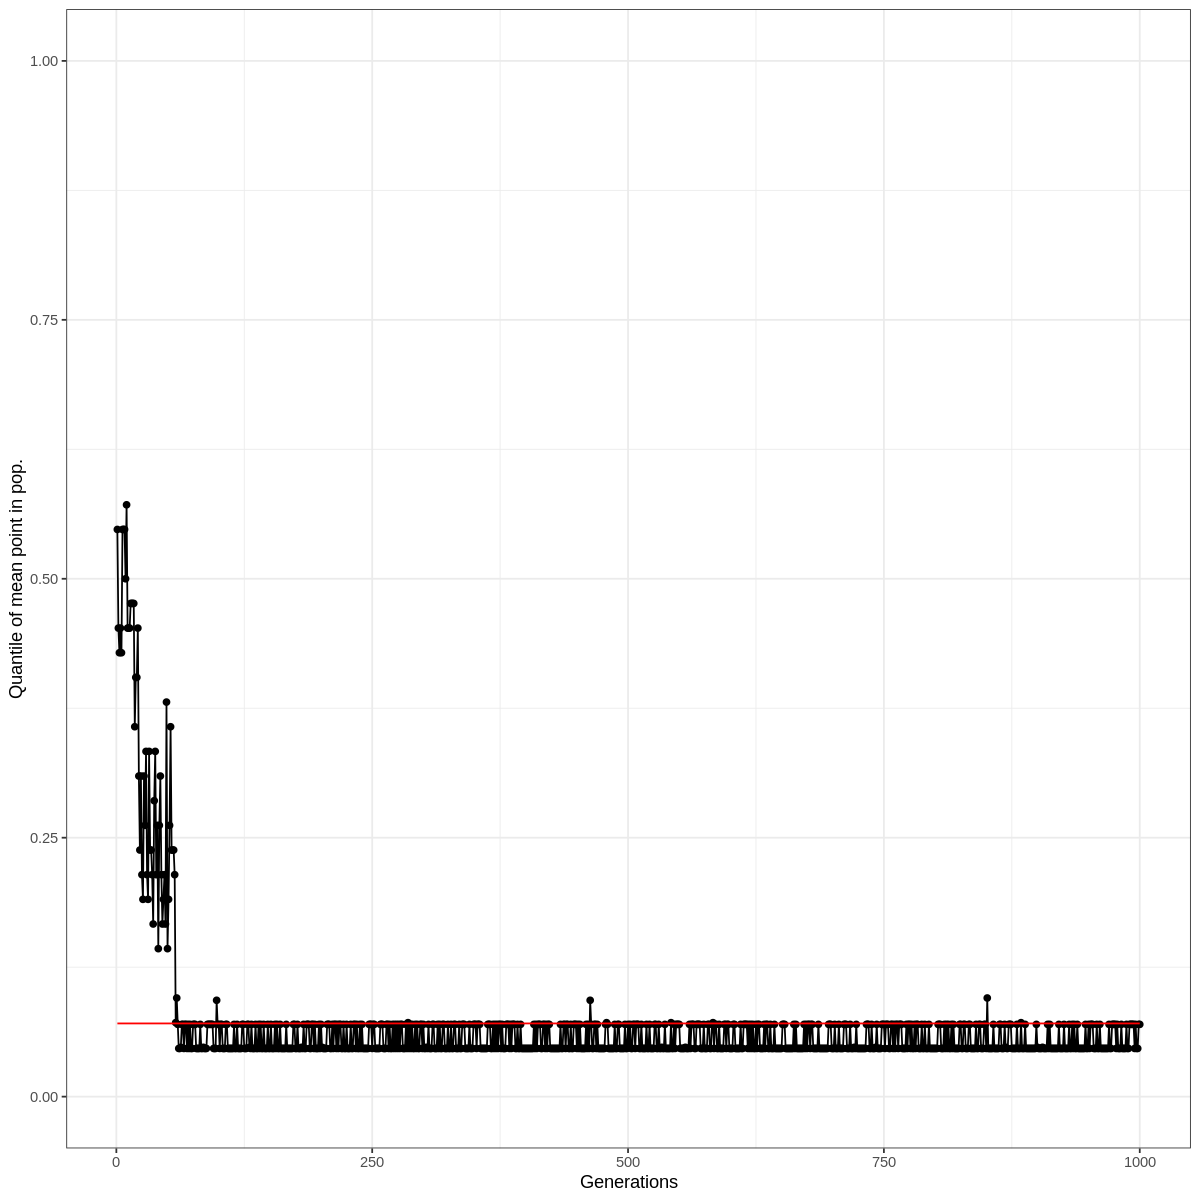

In [210]:
results[[5]] %>% quantileGens_plot()

### Funkcja liniowa

In [211]:
results = 
  main(10, linear_func, no_cma_es_sigma_down, -1, 1000, repetitions)

In [212]:
summary_result = 
  1:repetitions %>%
  purrr::map(function(iter) {
    results[[iter]]$df %>% 
      dplyr::summarize(mean_ave = mean(mean_q),
                       mean_min = min(mean_q),
                       mean_max = max(mean_q))
    }) %>%
  purrr::reduce(dplyr::bind_rows) %>%
  dplyr::mutate(t = 1:dplyr::n())

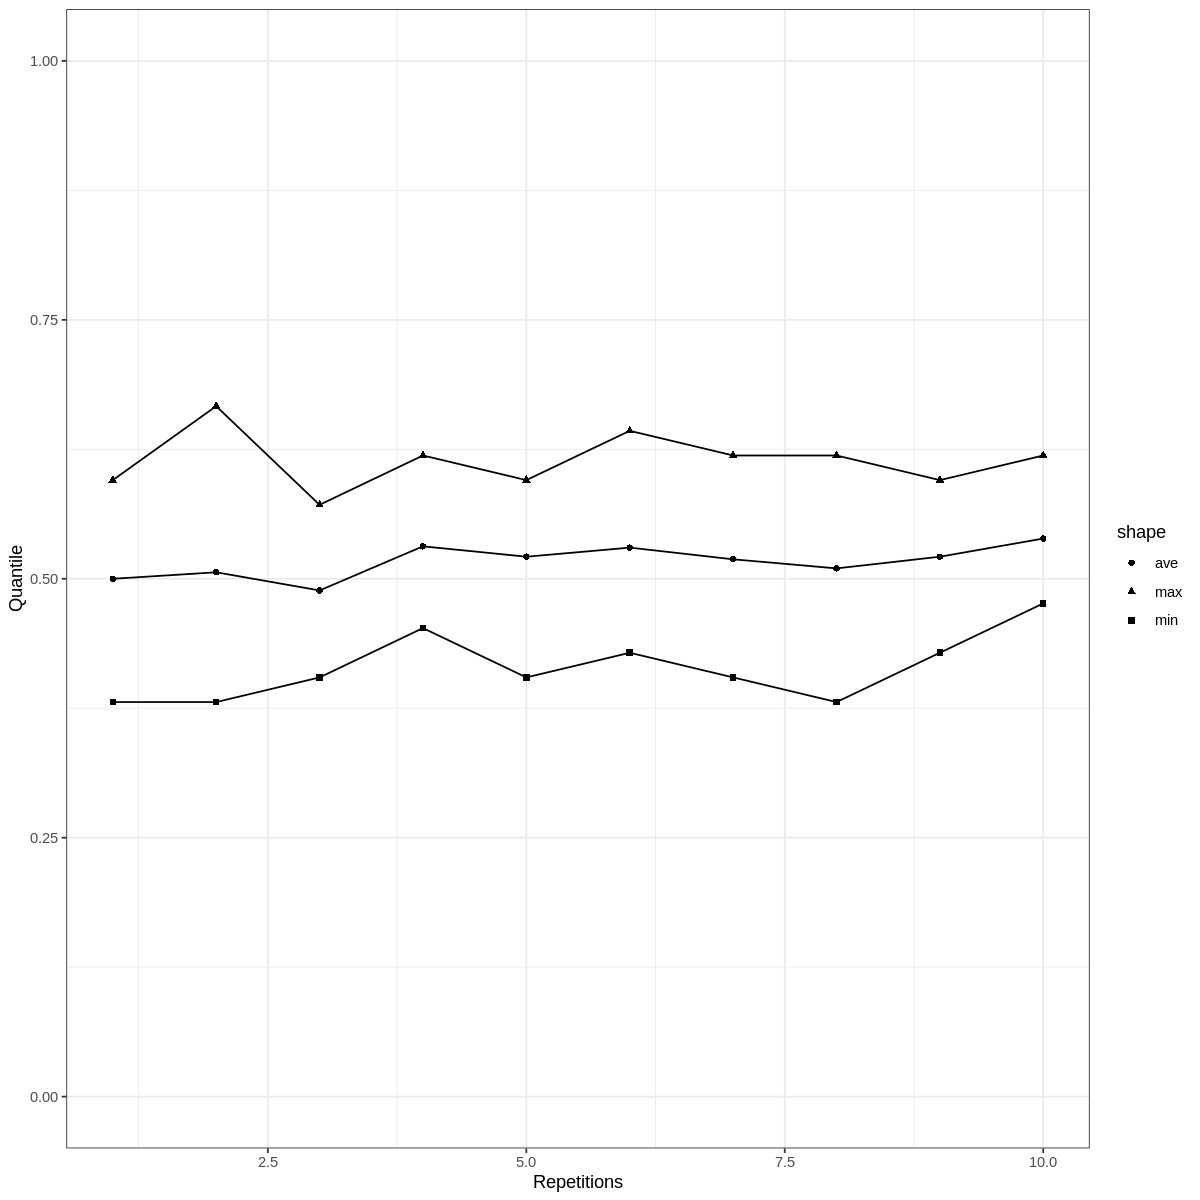

In [213]:
summary_result %>% 
    quantile_plot("mean") + ylim(0, 1)

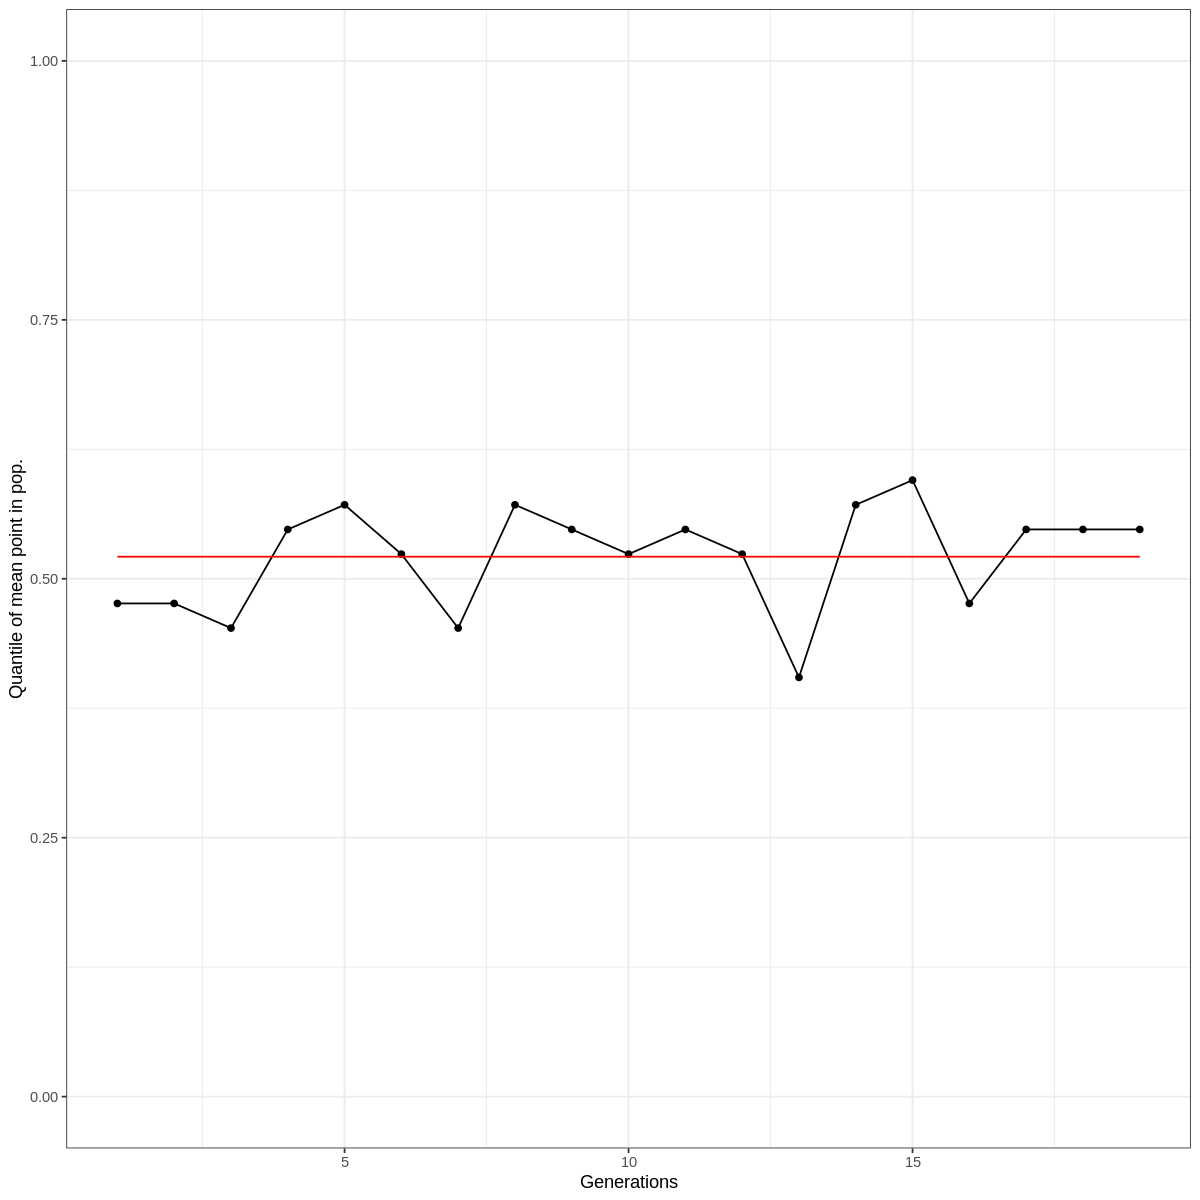

In [214]:
results[[5]] %>% quantileGens_plot()